SRAG 2021 e 2022 - Banco de Dados de Síndrome Respiratória Aguda Grave - incluindo dados da COVID-19

Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import io
import requests
from sklearn.feature_selection import chi2
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import warnings
from PIL import Image

Datasets

In [3]:
df_original = pd.read_csv('df_preprocessed.csv', delimiter=',')

In [46]:
df = df_original.copy(deep = True)
df.drop(columns=['Unnamed: 0'], inplace= True)

CONSTANTS

In [51]:
FAIXA_ETARIA = ['0-19', '20-24', '25-29', '30-34', '35-39', '40+']
DIC_RACA = {1: 'White', 2: 'Black', 3: 'Others', 4: 'Others', 5: 'Others', 9: 'Ignored'}

FAIXA_ESCOLARIDADE = ['None or Primary incomplete', 'Primary', 'Secondary','College or more']
DIC_ESCOLARIDADE = {0: 'None or Primary incomplete', 1: 'None or Primary incomplete', 2: 'Primary', 3: 'Secondary', 4: 'College or more', 5: 'Ignored', 9: 'Ignored'}

FAIXA_GRAVIDEZ = ['First trimester','Second trimester','Third trimester','Gestation period ignored', 'Puerpera']
DICT_GRAVIDEZ = {1: 'First trimester', 2: 'Second trimester',3: 'Third trimester', 4: 'Gestation period ignored', 5 : 'Puerpera'}

DICT_VACINA = {1: 'at least 1 dose', 2: 'Unvaccinated', 9: 'Ignored'}
FAIXA_VACINA = ['at least 1 dose','Unvaccinated']

FAIXA_REGIAO = ['North','Northeast','Southeast','South','Midwest']


Pre processing

In [48]:
df['CS_RACA'] = df['CS_RACA'].map(DIC_RACA)
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].map(DIC_ESCOLARIDADE)
df['GRAVIDEZ'] = df['GRAVIDEZ'].map(DICT_GRAVIDEZ)

df['VACINA_COV'] = df['VACINA_COV'].fillna(9)
df['VACINA_COV'] =df['VACINA_COV'].astype(int)
df['VACINA_COV'] = df['VACINA_COV'].map(DICT_VACINA)

**Table 2: Clinical features of SARS-CoV-2 infection among pregant and postpartum women, by SARS-COV-2 VOCs in Brazil.**

In [151]:
lista_febre = df['FEBRE'].tolist()
lista_tosse = df['TOSSE'].tolist()
lista_garganta = df['GARGANTA'].tolist()
lista_dispneia = df['DISPNEIA'].tolist()
lista_desc_resp = df['DESC_RESP'].tolist()
lista_saturacao = df['SATURACAO'].tolist()
lista_diarreia = df['DIARREIA'].tolist()
lista_vomito = df['VOMITO'].tolist()
lista_dor_abd = df['DOR_ABD'].tolist()
lista_fadiga = df['FADIGA'].tolist()
lista_perd_olft = df['PERD_OLFT'].tolist()
lista_perd_pala = df['PERD_PALA'].tolist()

relationship between fever and covid variant


------------- Valor p  : ----------------

H₀: The two categorical variables have no relationship
p-value : 0.37373258234111284

Failed to reject the null hypothesis.

Gráfico com a relação entre a febre e a variante do covid: 



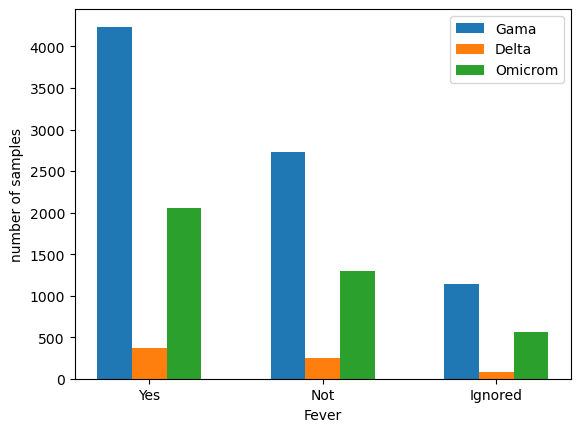


------------- Valor Total e Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------



,Gama N,Delta N,Omicrom N
Yes,4238 (52.21),365 (52.52),2054 (52.55)
Not,2733 (33.67),249 (35.83),1298 (33.21)
Ignored,1146 (14.12),81 (11.65),557 (14.25)


In [152]:
# criando datasets que separam as variantes
selecao_gama = (df['DT_COLETA'] >= '2021-03-01') & (df['DT_COLETA'] <= '2021-07-30')
selecao_delta = (df['DT_COLETA'] >= '2021-09-01') & (df['DT_COLETA'] <= '2021-11-30')
selecao_omicrom = (df['DT_COLETA'] >= '2022-01-01') & (df['DT_COLETA'] <= '2022-08-30')

df_selecao_gama = df[selecao_gama]
df_selecao_delta = df[selecao_delta]
df_selecao_omicrom = df[selecao_omicrom]

lista_gama = df[selecao_gama]['DT_COLETA'].tolist()
lista_delta = df[selecao_delta]['DT_COLETA'].tolist()
lista_omicrom = df[selecao_omicrom]['DT_COLETA'].tolist()
resultados_gama=[]
resultados_delta=[]
resultados_omicrom=[]

for i in range(len(lista_gama)):
  lista_gama[i] = 1 # definindo variante gama como 1

for i in range(len(lista_delta)):
  lista_delta[i] = 2 # definindo variante delta como 2

for i in range(len(lista_omicrom)):
  lista_omicrom[i] = 3 # definindo variante omicrom como 3

for i in range(len(df[selecao_gama])):
   concat1=[lista_febre[i],lista_gama[i]]
   resultados_gama.append(concat1)
for i in range(len(df[selecao_delta])):
   concat2=[lista_febre[i],lista_delta[i]]
   resultados_delta.append(concat2)
for i in range(len(df[selecao_omicrom])):
   concat3=[lista_febre[i],lista_omicrom[i]]
   resultados_omicrom.append(concat3)

resultados = resultados_gama + resultados_delta + resultados_omicrom

Faixa = ['Yes','Not','Ignored']

lista_1 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 1:
    lista_1.append(resultados[i][1])

lista_2 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 2:
    lista_2.append(resultados[i][1])

lista_3 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 9:
    lista_3.append(resultados[i][1])

y1 = [lista_1.count(1),lista_2.count(1), lista_3.count(1)]
y2 =[lista_1.count(2),lista_2.count(2), lista_3.count(2)]
y3 = [lista_1.count(3),lista_2.count(3), lista_3.count(3)]

matrix_table_int = np.array([y1,y2,y3]).transpose()
df_table_int = pd.DataFrame(matrix_table_int, columns=['Gama N', 'Delta N', 'Omicrom N'], index = Faixa)
df_table_int.loc['Total',:]= df_table_int.sum(axis=0)
df_table_int.loc[:,'Total'] = df_table_int.sum(axis=1)

#calculo do p-value : Qual a evidência de uma correlação entre a idade (no geral) e o tipo de variante do covid?
alpha = 0.05
chi_square = 0
columns = df_table_int.iloc[:,0:3].columns
rows = df_table_int.iloc[0:3].index
for i in columns:
  for j in rows:
    O = df_table_int[i][j] #observed value
    E = df_table_int[i]['Total'] *df_table_int['Total'][j] / df_table_int['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E

print()
print('------------- Valor p  : ----------------')
print()

p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

print()
print('Gráfico com a relação entre a febre e a variante do covid: ')
print()

width = 0.2

x = np.arange(len(Faixa))

plt.bar(x-0.2, y1, width, label = 'Gama')
plt.bar(x, y2, width, label = 'Delta')
plt.bar(x+0.2, y3, width, label = 'Omicrom')
plt.xlabel("Fever")
plt.ylabel("number of samples")
plt.xticks(x, Faixa)
plt.legend()
plt.show()

print()
print('------------- Valor Total e Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------')
print()

y1[:] = [float(i) / sum(y1) for i in y1]
y2[:] = [float(i) / sum(y2) for i in y2]
y3[:] = [float(i) / sum(y3) for i in y3]


y1 = [x*100 for x in y1]
y2 = [x*100 for x in y2]
y3 = [x*100 for x in y3]

y1 = [round(x,2) for x in y1]
y2 = [round(x,2) for x in y2]
y3 = [round(x,2) for x in y3]

matrix_table = np.array([y1,y2,y3])
matrix_table = matrix_table.transpose()
df_table = pd.DataFrame(matrix_table, columns=['Gama N (%) ', 'Delta N (%) ', 'Omicrom N (%)'], index = Faixa)

df_febre = df_table_int.iloc[0:3 :,0:3]
df_febre = df_febre.astype(int)
df_febre['Gama N (%)'] = df_table['Gama N (%) ']
df_febre['Delta N (%)'] = df_table['Delta N (%) ']
df_febre['Omicrom N (%)'] = df_table['Omicrom N (%)']
df_febre = df_febre.astype(str)

df_febre['Gama N'] = df_febre.apply(lambda x: x['Gama N'] + ' (' + x['Gama N (%)'] + ')', axis=1)
df_febre['Delta N'] = df_febre.apply(lambda x: x['Delta N'] + ' (' + x['Delta N (%)'] + ')', axis=1)
df_febre['Omicrom N'] = df_febre.apply(lambda x: x['Omicrom N'] + ' (' + x['Omicrom N (%)'] + ')', axis=1)
df_febre.drop(columns = ['Gama N (%)','Delta N (%)','Omicrom N (%)'], inplace = True)
display(df_febre)

relationship between cough and covid variant


------------- Valor p  : ----------------

H₀: The two categorical variables have no relationship
p-value : 0.9983413504107652

Failed to reject the null hypothesis.

Gráfico com a relação entre a tosse e a variante do covid: 



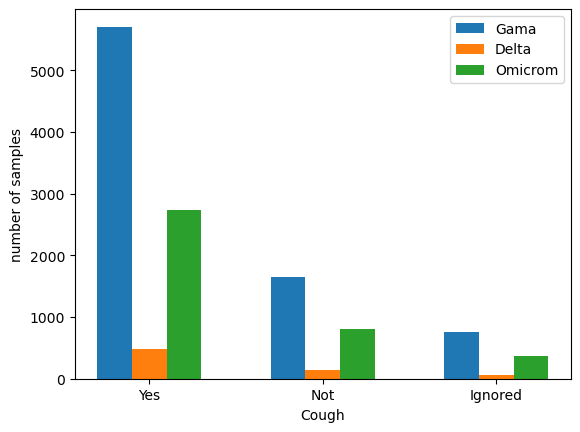


------------- Valor Total e Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------



,Gama N,Delta N,Omicrom N
Yes,5705 (70.28),486 (69.93),2737 (70.02)
Not,1649 (20.32),143 (20.58),800 (20.47)
Ignored,763 (9.4),66 (9.5),372 (9.52)


In [153]:
# criando datasets que separam as variantes
selecao_gama = (df['DT_COLETA'] >= '2021-03-01') & (df['DT_COLETA'] <= '2021-07-30')
selecao_delta = (df['DT_COLETA'] >= '2021-09-01') & (df['DT_COLETA'] <= '2021-11-30')
selecao_omicrom = (df['DT_COLETA'] >= '2022-01-01') & (df['DT_COLETA'] <= '2022-08-30')

df_selecao_gama = df[selecao_gama]
df_selecao_delta = df[selecao_delta]
df_selecao_omicrom = df[selecao_omicrom]

lista_gama = df[selecao_gama]['DT_COLETA'].tolist()
lista_delta = df[selecao_delta]['DT_COLETA'].tolist()
lista_omicrom = df[selecao_omicrom]['DT_COLETA'].tolist()
resultados_gama=[]
resultados_delta=[]
resultados_omicrom=[]

for i in range(len(lista_gama)):
  lista_gama[i] = 1 # definindo variante gama como 1

for i in range(len(lista_delta)):
  lista_delta[i] = 2 # definindo variante delta como 2

for i in range(len(lista_omicrom)):
  lista_omicrom[i] = 3 # definindo variante omicrom como 3

for i in range(len(df[selecao_gama])):
   concat1=[lista_tosse[i],lista_gama[i]]
   resultados_gama.append(concat1)
for i in range(len(df[selecao_delta])):
   concat2=[lista_tosse[i],lista_delta[i]]
   resultados_delta.append(concat2)
for i in range(len(df[selecao_omicrom])):
   concat3=[lista_tosse[i],lista_omicrom[i]]
   resultados_omicrom.append(concat3)

resultados = resultados_gama + resultados_delta + resultados_omicrom

Faixa = ['Yes','Not','Ignored']

lista_1 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 1:
    lista_1.append(resultados[i][1])

lista_2 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 2:
    lista_2.append(resultados[i][1])

lista_3 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 9:
    lista_3.append(resultados[i][1])

y1 = [lista_1.count(1),lista_2.count(1), lista_3.count(1)]
y2 =[lista_1.count(2),lista_2.count(2), lista_3.count(2)]
y3 = [lista_1.count(3),lista_2.count(3), lista_3.count(3)]

matrix_table_int = np.array([y1,y2,y3]).transpose()
df_table_int = pd.DataFrame(matrix_table_int, columns=['Gama N', 'Delta N', 'Omicrom N'], index = Faixa)
df_table_int.loc['Total',:]= df_table_int.sum(axis=0)
df_table_int.loc[:,'Total'] = df_table_int.sum(axis=1)

#calculo do p-value : Qual a evidência de uma correlação entre a idade (no geral) e o tipo de variante do covid?
alpha = 0.05
chi_square = 0
columns = df_table_int.iloc[:,0:3].columns
rows = df_table_int.iloc[0:3].index
for i in columns:
  for j in rows:
    O = df_table_int[i][j] #observed value
    E = df_table_int[i]['Total'] *df_table_int['Total'][j] / df_table_int['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E

print()
print('------------- Valor p  : ----------------')
print()

p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

print()
print('Gráfico com a relação entre a tosse e a variante do covid: ')
print()

width = 0.2

x = np.arange(len(Faixa))

plt.bar(x-0.2, y1, width, label = 'Gama')
plt.bar(x, y2, width, label = 'Delta')
plt.bar(x+0.2, y3, width, label = 'Omicrom')
plt.xlabel("Cough")
plt.ylabel("number of samples")
plt.xticks(x, Faixa)
plt.legend()
plt.show()

print()
print('------------- Valor Total e Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------')
print()

y1[:] = [float(i) / sum(y1) for i in y1]
y2[:] = [float(i) / sum(y2) for i in y2]
y3[:] = [float(i) / sum(y3) for i in y3]


y1 = [x*100 for x in y1]
y2 = [x*100 for x in y2]
y3 = [x*100 for x in y3]

y1 = [round(x,2) for x in y1]
y2 = [round(x,2) for x in y2]
y3 = [round(x,2) for x in y3]

matrix_table = np.array([y1,y2,y3])
matrix_table = matrix_table.transpose()
df_table = pd.DataFrame(matrix_table, columns=['Gama N (%) ', 'Delta N (%) ', 'Omicrom N (%)'], index = Faixa)

df_Tosse = df_table_int.iloc[0:3 :,0:3]
df_Tosse = df_Tosse.astype(int)
df_Tosse['Gama N (%)'] = df_table['Gama N (%) ']
df_Tosse['Delta N (%)'] = df_table['Delta N (%) ']
df_Tosse['Omicrom N (%)'] = df_table['Omicrom N (%)']
df_Tosse = df_Tosse.astype(str)

df_Tosse['Gama N'] = df_Tosse.apply(lambda x: x['Gama N'] + ' (' + x['Gama N (%)'] + ')', axis=1)
df_Tosse['Delta N'] = df_Tosse.apply(lambda x: x['Delta N'] + ' (' + x['Delta N (%)'] + ')', axis=1)
df_Tosse['Omicrom N'] = df_Tosse.apply(lambda x: x['Omicrom N'] + ' (' + x['Omicrom N (%)'] + ')', axis=1)
df_Tosse.drop(columns = ['Gama N (%)','Delta N (%)','Omicrom N (%)'], inplace = True)
display(df_Tosse)

relationship between Dyspnea and covid variant


------------- Valor p  : ----------------

H₀: The two categorical variables have no relationship
p-value : 0.7629363680923513

Failed to reject the null hypothesis.

Gráfico com a relação entre a dispneia e a variante do covid: 



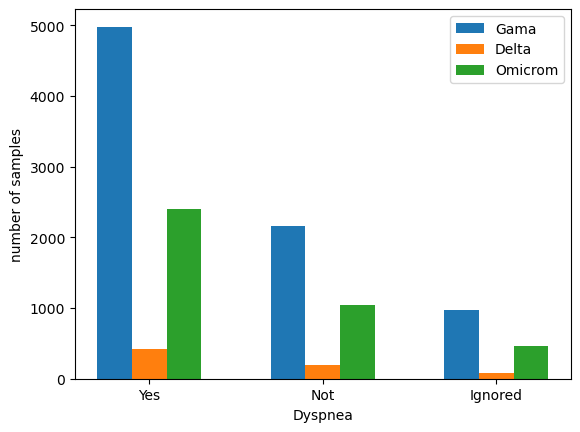


------------- Valor Total e Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------



,Gama N,Delta N,Omicrom N
Yes,4979 (61.34),417 (60.0),2397 (61.32)
Not,2165 (26.67),201 (28.92),1049 (26.84)
Ignored,973 (11.99),77 (11.08),463 (11.84)


In [154]:
# criando datasets que separam as variantes
selecao_gama = (df['DT_COLETA'] >= '2021-03-01') & (df['DT_COLETA'] <= '2021-07-30')
selecao_delta = (df['DT_COLETA'] >= '2021-09-01') & (df['DT_COLETA'] <= '2021-11-30')
selecao_omicrom = (df['DT_COLETA'] >= '2022-01-01') & (df['DT_COLETA'] <= '2022-08-30')

df_selecao_gama = df[selecao_gama]
df_selecao_delta = df[selecao_delta]
df_selecao_omicrom = df[selecao_omicrom]

lista_gama = df[selecao_gama]['DT_COLETA'].tolist()
lista_delta = df[selecao_delta]['DT_COLETA'].tolist()
lista_omicrom = df[selecao_omicrom]['DT_COLETA'].tolist()
resultados_gama=[]
resultados_delta=[]
resultados_omicrom=[]

for i in range(len(lista_gama)):
  lista_gama[i] = 1 # definindo variante gama como 1

for i in range(len(lista_delta)):
  lista_delta[i] = 2 # definindo variante delta como 2

for i in range(len(lista_omicrom)):
  lista_omicrom[i] = 3 # definindo variante omicrom como 3

for i in range(len(df[selecao_gama])):
   concat1=[lista_dispneia[i],lista_gama[i]]
   resultados_gama.append(concat1)
for i in range(len(df[selecao_delta])):
   concat2=[lista_dispneia[i],lista_delta[i]]
   resultados_delta.append(concat2)
for i in range(len(df[selecao_omicrom])):
   concat3=[lista_dispneia[i],lista_omicrom[i]]
   resultados_omicrom.append(concat3)

resultados = resultados_gama + resultados_delta + resultados_omicrom

Faixa = ['Yes','Not','Ignored']

lista_1 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 1:
    lista_1.append(resultados[i][1])

lista_2 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 2:
    lista_2.append(resultados[i][1])

lista_3 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 9:
    lista_3.append(resultados[i][1])

y1 = [lista_1.count(1),lista_2.count(1), lista_3.count(1)]
y2 =[lista_1.count(2),lista_2.count(2), lista_3.count(2)]
y3 = [lista_1.count(3),lista_2.count(3), lista_3.count(3)]

matrix_table_int = np.array([y1,y2,y3]).transpose()
df_table_int = pd.DataFrame(matrix_table_int, columns=['Gama N', 'Delta N', 'Omicrom N'], index = Faixa)
df_table_int.loc['Total',:]= df_table_int.sum(axis=0)
df_table_int.loc[:,'Total'] = df_table_int.sum(axis=1)

#calculo do p-value : Qual a evidência de uma correlação entre a idade (no geral) e o tipo de variante do covid?
alpha = 0.05
chi_square = 0
columns = df_table_int.iloc[:,0:3].columns
rows = df_table_int.iloc[0:3].index
for i in columns:
  for j in rows:
    O = df_table_int[i][j] #observed value
    E = df_table_int[i]['Total'] *df_table_int['Total'][j] / df_table_int['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E

print()
print('------------- Valor p  : ----------------')
print()

p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

print()
print('Gráfico com a relação entre a dispneia e a variante do covid: ')
print()

width = 0.2

x = np.arange(len(Faixa))

plt.bar(x-0.2, y1, width, label = 'Gama')
plt.bar(x, y2, width, label = 'Delta')
plt.bar(x+0.2, y3, width, label = 'Omicrom')
plt.xlabel("Dyspnea")
plt.ylabel("number of samples")
plt.xticks(x, Faixa)
plt.legend()
plt.show()

print()
print('------------- Valor Total e Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------')
print()

y1[:] = [float(i) / sum(y1) for i in y1]
y2[:] = [float(i) / sum(y2) for i in y2]
y3[:] = [float(i) / sum(y3) for i in y3]


y1 = [x*100 for x in y1]
y2 = [x*100 for x in y2]
y3 = [x*100 for x in y3]

y1 = [round(x,2) for x in y1]
y2 = [round(x,2) for x in y2]
y3 = [round(x,2) for x in y3]

matrix_table = np.array([y1,y2,y3])
matrix_table = matrix_table.transpose()
df_table = pd.DataFrame(matrix_table, columns=['Gama N (%) ', 'Delta N (%) ', 'Omicrom N (%)'], index = Faixa)

df_Dispneia = df_table_int.iloc[0:3 :,0:3]
df_Dispneia = df_Dispneia.astype(int)
df_Dispneia['Gama N (%)'] = df_table['Gama N (%) ']
df_Dispneia['Delta N (%)'] = df_table['Delta N (%) ']
df_Dispneia['Omicrom N (%)'] = df_table['Omicrom N (%)']
df_Dispneia = df_Dispneia.astype(str)

df_Dispneia['Gama N'] = df_Dispneia.apply(lambda x: x['Gama N'] + ' (' + x['Gama N (%)'] + ')', axis=1)
df_Dispneia['Delta N'] = df_Dispneia.apply(lambda x: x['Delta N'] + ' (' + x['Delta N (%)'] + ')', axis=1)
df_Dispneia['Omicrom N'] = df_Dispneia.apply(lambda x: x['Omicrom N'] + ' (' + x['Omicrom N (%)'] + ')', axis=1)
df_Dispneia.drop(columns = ['Gama N (%)','Delta N (%)','Omicrom N (%)'], inplace = True)
display(df_Dispneia)

relationship between diarrhea and covid variant


------------- Valor p  : ----------------

H₀: The two categorical variables have no relationship
p-value : 0.49040132102720824

Failed to reject the null hypothesis.

Gráfico com a relação entre a diarreia e a variante do covid: 



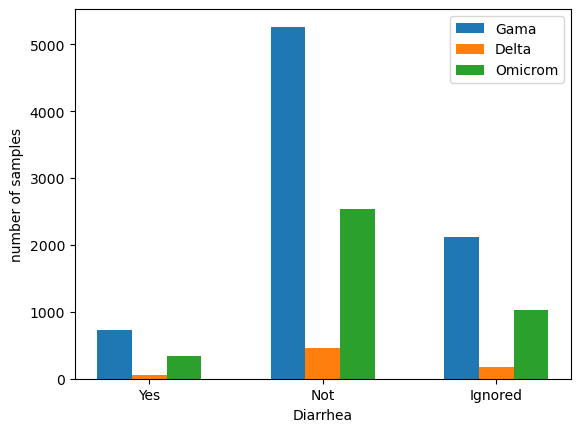


------------- Valor Total e Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------



,Gama N,Delta N,Omicrom N
Yes,733 (9.03),49 (7.05),340 (8.7)
Not,5264 (64.85),465 (66.91),2539 (64.95)
Ignored,2120 (26.12),181 (26.04),1030 (26.35)


In [155]:
# criando datasets que separam as variantes
selecao_gama = (df['DT_COLETA'] >= '2021-03-01') & (df['DT_COLETA'] <= '2021-07-30')
selecao_delta = (df['DT_COLETA'] >= '2021-09-01') & (df['DT_COLETA'] <= '2021-11-30')
selecao_omicrom = (df['DT_COLETA'] >= '2022-01-01') & (df['DT_COLETA'] <= '2022-08-30')

df_selecao_gama = df[selecao_gama]
df_selecao_delta = df[selecao_delta]
df_selecao_omicrom = df[selecao_omicrom]

lista_gama = df[selecao_gama]['DT_COLETA'].tolist()
lista_delta = df[selecao_delta]['DT_COLETA'].tolist()
lista_omicrom = df[selecao_omicrom]['DT_COLETA'].tolist()
resultados_gama=[]
resultados_delta=[]
resultados_omicrom=[]

for i in range(len(lista_gama)):
  lista_gama[i] = 1 # definindo variante gama como 1

for i in range(len(lista_delta)):
  lista_delta[i] = 2 # definindo variante delta como 2

for i in range(len(lista_omicrom)):
  lista_omicrom[i] = 3 # definindo variante omicrom como 3

for i in range(len(df[selecao_gama])):
   concat1=[lista_diarreia[i],lista_gama[i]]
   resultados_gama.append(concat1)
for i in range(len(df[selecao_delta])):
   concat2=[lista_diarreia[i],lista_delta[i]]
   resultados_delta.append(concat2)
for i in range(len(df[selecao_omicrom])):
   concat3=[lista_diarreia[i],lista_omicrom[i]]
   resultados_omicrom.append(concat3)

resultados = resultados_gama + resultados_delta + resultados_omicrom

Faixa = ['Yes','Not','Ignored']

lista_1 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 1:
    lista_1.append(resultados[i][1])

lista_2 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 2:
    lista_2.append(resultados[i][1])

lista_3 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 9:
    lista_3.append(resultados[i][1])

y1 = [lista_1.count(1),lista_2.count(1), lista_3.count(1)]
y2 =[lista_1.count(2),lista_2.count(2), lista_3.count(2)]
y3 = [lista_1.count(3),lista_2.count(3), lista_3.count(3)]

matrix_table_int = np.array([y1,y2,y3]).transpose()
df_table_int = pd.DataFrame(matrix_table_int, columns=['Gama N', 'Delta N', 'Omicrom N'], index = Faixa)
df_table_int.loc['Total',:]= df_table_int.sum(axis=0)
df_table_int.loc[:,'Total'] = df_table_int.sum(axis=1)

#calculo do p-value : Qual a evidência de uma correlação entre a idade (no geral) e o tipo de variante do covid?
alpha = 0.05
chi_square = 0
columns = df_table_int.iloc[:,0:3].columns
rows = df_table_int.iloc[0:3].index
for i in columns:
  for j in rows:
    O = df_table_int[i][j] #observed value
    E = df_table_int[i]['Total'] *df_table_int['Total'][j] / df_table_int['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E

print()
print('------------- Valor p  : ----------------')
print()

p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

print()
print('Gráfico com a relação entre a diarreia e a variante do covid: ')
print()

width = 0.2

x = np.arange(len(Faixa))

plt.bar(x-0.2, y1, width, label = 'Gama')
plt.bar(x, y2, width, label = 'Delta')
plt.bar(x+0.2, y3, width, label = 'Omicrom')
plt.xlabel("Diarrhea")
plt.ylabel("number of samples")
plt.xticks(x, Faixa)
plt.legend()
plt.show()

print()
print('------------- Valor Total e Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------')
print()

y1[:] = [float(i) / sum(y1) for i in y1]
y2[:] = [float(i) / sum(y2) for i in y2]
y3[:] = [float(i) / sum(y3) for i in y3]


y1 = [x*100 for x in y1]
y2 = [x*100 for x in y2]
y3 = [x*100 for x in y3]

y1 = [round(x,2) for x in y1]
y2 = [round(x,2) for x in y2]
y3 = [round(x,2) for x in y3]

matrix_table = np.array([y1,y2,y3])
matrix_table = matrix_table.transpose()
df_table = pd.DataFrame(matrix_table, columns=['Gama N (%) ', 'Delta N (%) ', 'Omicrom N (%)'], index = Faixa)

df_Diarreia = df_table_int.iloc[0:3 :,0:3]
df_Diarreia = df_Diarreia.astype(int)
df_Diarreia['Gama N (%)'] = df_table['Gama N (%) ']
df_Diarreia['Delta N (%)'] = df_table['Delta N (%) ']
df_Diarreia['Omicrom N (%)'] = df_table['Omicrom N (%)']
df_Diarreia = df_Diarreia.astype(str)

df_Diarreia['Gama N'] = df_Diarreia.apply(lambda x: x['Gama N'] + ' (' + x['Gama N (%)'] + ')', axis=1)
df_Diarreia['Delta N'] = df_Diarreia.apply(lambda x: x['Delta N'] + ' (' + x['Delta N (%)'] + ')', axis=1)
df_Diarreia['Omicrom N'] = df_Diarreia.apply(lambda x: x['Omicrom N'] + ' (' + x['Omicrom N (%)'] + ')', axis=1)
df_Diarreia.drop(columns = ['Gama N (%)','Delta N (%)','Omicrom N (%)'], inplace = True)
display(df_Diarreia)

Relationship between Vomito and covid variant


------------- Valor p  : ----------------

H₀: The two categorical variables have no relationship
p-value : 0.8866779784159556

Failed to reject the null hypothesis.

Gráfico com a relação entre o vomito e a variante do covid: 



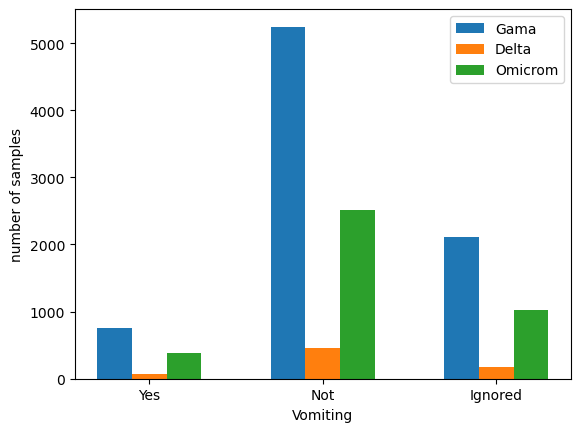


------------- Valor Total e Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------



,Gama N,Delta N,Omicrom N
Yes,757 (9.33),68 (9.78),380 (9.72)
Not,5245 (64.62),455 (65.47),2508 (64.16)
Ignored,2115 (26.06),172 (24.75),1021 (26.12)


In [156]:
# criando datasets que separam as variantes
selecao_gama = (df['DT_COLETA'] >= '2021-03-01') & (df['DT_COLETA'] <= '2021-07-30')
selecao_delta = (df['DT_COLETA'] >= '2021-09-01') & (df['DT_COLETA'] <= '2021-11-30')
selecao_omicrom = (df['DT_COLETA'] >= '2022-01-01') & (df['DT_COLETA'] <= '2022-08-30')

df_selecao_gama = df[selecao_gama]
df_selecao_delta = df[selecao_delta]
df_selecao_omicrom = df[selecao_omicrom]

lista_gama = df[selecao_gama]['DT_COLETA'].tolist()
lista_delta = df[selecao_delta]['DT_COLETA'].tolist()
lista_omicrom = df[selecao_omicrom]['DT_COLETA'].tolist()
resultados_gama=[]
resultados_delta=[]
resultados_omicrom=[]

for i in range(len(lista_gama)):
  lista_gama[i] = 1 # definindo variante gama como 1

for i in range(len(lista_delta)):
  lista_delta[i] = 2 # definindo variante delta como 2

for i in range(len(lista_omicrom)):
  lista_omicrom[i] = 3 # definindo variante omicrom como 3

for i in range(len(df[selecao_gama])):
   concat1=[lista_vomito[i],lista_gama[i]]
   resultados_gama.append(concat1)
for i in range(len(df[selecao_delta])):
   concat2=[lista_vomito[i],lista_delta[i]]
   resultados_delta.append(concat2)
for i in range(len(df[selecao_omicrom])):
   concat3=[lista_vomito[i],lista_omicrom[i]]
   resultados_omicrom.append(concat3)

resultados = resultados_gama + resultados_delta + resultados_omicrom

Faixa = ['Yes','Not','Ignored']

lista_1 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 1:
    lista_1.append(resultados[i][1])

lista_2 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 2:
    lista_2.append(resultados[i][1])

lista_3 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 9:
    lista_3.append(resultados[i][1])

y1 = [lista_1.count(1),lista_2.count(1), lista_3.count(1)]
y2 =[lista_1.count(2),lista_2.count(2), lista_3.count(2)]
y3 = [lista_1.count(3),lista_2.count(3), lista_3.count(3)]

matrix_table_int = np.array([y1,y2,y3]).transpose()
df_table_int = pd.DataFrame(matrix_table_int, columns=['Gama N', 'Delta N', 'Omicrom N'], index = Faixa)
df_table_int.loc['Total',:]= df_table_int.sum(axis=0)
df_table_int.loc[:,'Total'] = df_table_int.sum(axis=1)

#calculo do p-value : Qual a evidência de uma correlação entre a idade (no geral) e o tipo de variante do covid?
alpha = 0.05
chi_square = 0
columns = df_table_int.iloc[:,0:3].columns
rows = df_table_int.iloc[0:3].index
for i in columns:
  for j in rows:
    O = df_table_int[i][j] #observed value
    E = df_table_int[i]['Total'] *df_table_int['Total'][j] / df_table_int['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E

print()
print('------------- Valor p  : ----------------')
print()

p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

print()
print('Gráfico com a relação entre o vomito e a variante do covid: ')
print()

width = 0.2

x = np.arange(len(Faixa))

plt.bar(x-0.2, y1, width, label = 'Gama')
plt.bar(x, y2, width, label = 'Delta')
plt.bar(x+0.2, y3, width, label = 'Omicrom')
plt.xlabel("Vomiting")
plt.ylabel("number of samples")
plt.xticks(x, Faixa)
plt.legend()
plt.show()

print()
print('------------- Valor Total e Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------')
print()

y1[:] = [float(i) / sum(y1) for i in y1]
y2[:] = [float(i) / sum(y2) for i in y2]
y3[:] = [float(i) / sum(y3) for i in y3]


y1 = [x*100 for x in y1]
y2 = [x*100 for x in y2]
y3 = [x*100 for x in y3]

y1 = [round(x,2) for x in y1]
y2 = [round(x,2) for x in y2]
y3 = [round(x,2) for x in y3]

matrix_table = np.array([y1,y2,y3])
matrix_table = matrix_table.transpose()
df_table = pd.DataFrame(matrix_table, columns=['Gama N (%) ', 'Delta N (%) ', 'Omicrom N (%)'], index = Faixa)

df_Vomito = df_table_int.iloc[0:3 :,0:3]
df_Vomito = df_Vomito.astype(int)
df_Vomito['Gama N (%)'] = df_table['Gama N (%) ']
df_Vomito['Delta N (%)'] = df_table['Delta N (%) ']
df_Vomito['Omicrom N (%)'] = df_table['Omicrom N (%)']
df_Vomito = df_Vomito.astype(str)

df_Vomito['Gama N'] = df_Vomito.apply(lambda x: x['Gama N'] + ' (' + x['Gama N (%)'] + ')', axis=1)
df_Vomito['Delta N'] = df_Vomito.apply(lambda x: x['Delta N'] + ' (' + x['Delta N (%)'] + ')', axis=1)
df_Vomito['Omicrom N'] = df_Vomito.apply(lambda x: x['Omicrom N'] + ' (' + x['Omicrom N (%)'] + ')', axis=1)
df_Vomito.drop(columns = ['Gama N (%)','Delta N (%)','Omicrom N (%)'], inplace = True)
display(df_Vomito)

relationship between fatigue and covid variant


------------- Valor p  : ----------------

H₀: The two categorical variables have no relationship
p-value : 0.8726120276477883

Failed to reject the null hypothesis.

Gráfico com a relação entre a fadiga e a variante do covid: 



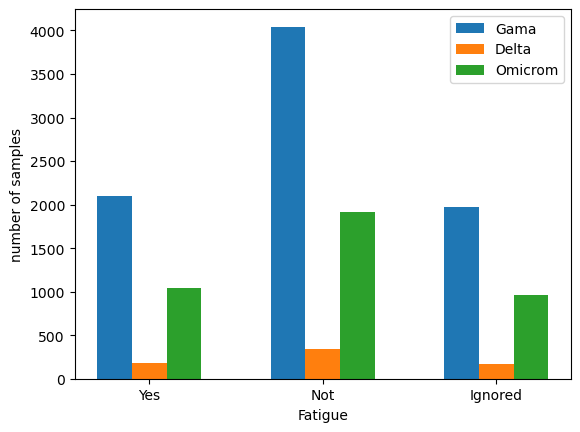


------------- Valor Total e Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------



,Gama N,Delta N,Omicrom N
Yes,2098 (25.85),184 (26.47),1037 (26.53)
Not,4043 (49.81),347 (49.93),1911 (48.89)
Ignored,1976 (24.34),164 (23.6),961 (24.58)


In [157]:
# criando datasets que separam as variantes
selecao_gama = (df['DT_COLETA'] >= '2021-03-01') & (df['DT_COLETA'] <= '2021-07-30')
selecao_delta = (df['DT_COLETA'] >= '2021-09-01') & (df['DT_COLETA'] <= '2021-11-30')
selecao_omicrom = (df['DT_COLETA'] >= '2022-01-01') & (df['DT_COLETA'] <= '2022-08-30')

df_selecao_gama = df[selecao_gama]
df_selecao_delta = df[selecao_delta]
df_selecao_omicrom = df[selecao_omicrom]

lista_gama = df[selecao_gama]['DT_COLETA'].tolist()
lista_delta = df[selecao_delta]['DT_COLETA'].tolist()
lista_omicrom = df[selecao_omicrom]['DT_COLETA'].tolist()
resultados_gama=[]
resultados_delta=[]
resultados_omicrom=[]

for i in range(len(lista_gama)):
  lista_gama[i] = 1 # definindo variante gama como 1

for i in range(len(lista_delta)):
  lista_delta[i] = 2 # definindo variante delta como 2

for i in range(len(lista_omicrom)):
  lista_omicrom[i] = 3 # definindo variante omicrom como 3

for i in range(len(df[selecao_gama])):
   concat1=[lista_fadiga[i],lista_gama[i]]
   resultados_gama.append(concat1)
for i in range(len(df[selecao_delta])):
   concat2=[lista_fadiga[i],lista_delta[i]]
   resultados_delta.append(concat2)
for i in range(len(df[selecao_omicrom])):
   concat3=[lista_fadiga[i],lista_omicrom[i]]
   resultados_omicrom.append(concat3)

resultados = resultados_gama + resultados_delta + resultados_omicrom

Faixa = ['Yes','Not','Ignored']

lista_1 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 1:
    lista_1.append(resultados[i][1])

lista_2 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 2:
    lista_2.append(resultados[i][1])

lista_3 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 9:
    lista_3.append(resultados[i][1])

y1 = [lista_1.count(1),lista_2.count(1), lista_3.count(1)]
y2 =[lista_1.count(2),lista_2.count(2), lista_3.count(2)]
y3 = [lista_1.count(3),lista_2.count(3), lista_3.count(3)]

matrix_table_int = np.array([y1,y2,y3]).transpose()
df_table_int = pd.DataFrame(matrix_table_int, columns=['Gama N', 'Delta N', 'Omicrom N'], index = Faixa)
df_table_int.loc['Total',:]= df_table_int.sum(axis=0)
df_table_int.loc[:,'Total'] = df_table_int.sum(axis=1)

#calculo do p-value : Qual a evidência de uma correlação entre a idade (no geral) e o tipo de variante do covid?
alpha = 0.05
chi_square = 0
columns = df_table_int.iloc[:,0:3].columns
rows = df_table_int.iloc[0:3].index
for i in columns:
  for j in rows:
    O = df_table_int[i][j] #observed value
    E = df_table_int[i]['Total'] *df_table_int['Total'][j] / df_table_int['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E

print()
print('------------- Valor p  : ----------------')
print()

p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

print()
print('Gráfico com a relação entre a fadiga e a variante do covid: ')
print()

width = 0.2

x = np.arange(len(Faixa))

plt.bar(x-0.2, y1, width, label = 'Gama')
plt.bar(x, y2, width, label = 'Delta')
plt.bar(x+0.2, y3, width, label = 'Omicrom')
plt.xlabel("Fatigue")
plt.ylabel("number of samples")
plt.xticks(x, Faixa)
plt.legend()
plt.show()

print()
print('------------- Valor Total e Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------')
print()

y1[:] = [float(i) / sum(y1) for i in y1]
y2[:] = [float(i) / sum(y2) for i in y2]
y3[:] = [float(i) / sum(y3) for i in y3]


y1 = [x*100 for x in y1]
y2 = [x*100 for x in y2]
y3 = [x*100 for x in y3]

y1 = [round(x,2) for x in y1]
y2 = [round(x,2) for x in y2]
y3 = [round(x,2) for x in y3]

matrix_table = np.array([y1,y2,y3])
matrix_table = matrix_table.transpose()
df_table = pd.DataFrame(matrix_table, columns=['Gama N (%) ', 'Delta N (%) ', 'Omicrom N (%)'], index = Faixa)

df_Fadiga = df_table_int.iloc[0:3 :,0:3]
df_Fadiga = df_Fadiga.astype(int)
df_Fadiga['Gama N (%)'] = df_table['Gama N (%) ']
df_Fadiga['Delta N (%)'] = df_table['Delta N (%) ']
df_Fadiga['Omicrom N (%)'] = df_table['Omicrom N (%)']
df_Fadiga = df_Fadiga.astype(str)

df_Fadiga['Gama N'] = df_Fadiga.apply(lambda x: x['Gama N'] + ' (' + x['Gama N (%)'] + ')', axis=1)
df_Fadiga['Delta N'] = df_Fadiga.apply(lambda x: x['Delta N'] + ' (' + x['Delta N (%)'] + ')', axis=1)
df_Fadiga['Omicrom N'] = df_Fadiga.apply(lambda x: x['Omicrom N'] + ' (' + x['Omicrom N (%)'] + ')', axis=1)
df_Fadiga.drop(columns = ['Gama N (%)','Delta N (%)','Omicrom N (%)'], inplace = True)
display(df_Fadiga)

relationship between sore throat and covid variant


------------- Valor p  : ----------------

H₀: The two categorical variables have no relationship
p-value : 0.7865636369510413

Failed to reject the null hypothesis.

Gráfico com a relação entre a dor de garganta e a variante do covid: 



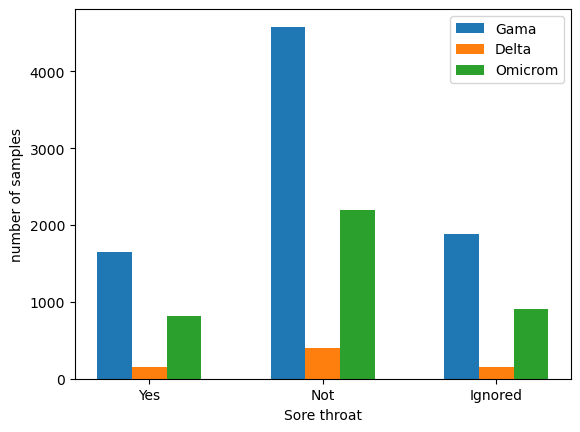


------------- Valor Total e Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------



,Gama N,Delta N,Omicrom N
Yes,1649 (20.32),148 (21.29),810 (20.72)
Not,4582 (56.45),399 (57.41),2191 (56.05)
Ignored,1886 (23.24),148 (21.29),908 (23.23)


In [158]:
# criando datasets que separam as variantes
selecao_gama = (df['DT_COLETA'] >= '2021-03-01') & (df['DT_COLETA'] <= '2021-07-30')
selecao_delta = (df['DT_COLETA'] >= '2021-09-01') & (df['DT_COLETA'] <= '2021-11-30')
selecao_omicrom = (df['DT_COLETA'] >= '2022-01-01') & (df['DT_COLETA'] <= '2022-08-30')

df_selecao_gama = df[selecao_gama]
df_selecao_delta = df[selecao_delta]
df_selecao_omicrom = df[selecao_omicrom]

lista_gama = df[selecao_gama]['DT_COLETA'].tolist()
lista_delta = df[selecao_delta]['DT_COLETA'].tolist()
lista_omicrom = df[selecao_omicrom]['DT_COLETA'].tolist()
resultados_gama=[]
resultados_delta=[]
resultados_omicrom=[]

for i in range(len(lista_gama)):
  lista_gama[i] = 1 # definindo variante gama como 1

for i in range(len(lista_delta)):
  lista_delta[i] = 2 # definindo variante delta como 2

for i in range(len(lista_omicrom)):
  lista_omicrom[i] = 3 # definindo variante omicrom como 3

for i in range(len(df[selecao_gama])):
   concat1=[lista_garganta[i],lista_gama[i]]
   resultados_gama.append(concat1)
for i in range(len(df[selecao_delta])):
   concat2=[lista_garganta[i],lista_delta[i]]
   resultados_delta.append(concat2)
for i in range(len(df[selecao_omicrom])):
   concat3=[lista_garganta[i],lista_omicrom[i]]
   resultados_omicrom.append(concat3)

resultados = resultados_gama + resultados_delta + resultados_omicrom

Faixa = ['Yes','Not','Ignored']

lista_1 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 1:
    lista_1.append(resultados[i][1])

lista_2 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 2:
    lista_2.append(resultados[i][1])

lista_3 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 9:
    lista_3.append(resultados[i][1])

y1 = [lista_1.count(1),lista_2.count(1), lista_3.count(1)]
y2 =[lista_1.count(2),lista_2.count(2), lista_3.count(2)]
y3 = [lista_1.count(3),lista_2.count(3), lista_3.count(3)]

matrix_table_int = np.array([y1,y2,y3]).transpose()
df_table_int = pd.DataFrame(matrix_table_int, columns=['Gama N', 'Delta N', 'Omicrom N'], index = Faixa)
df_table_int.loc['Total',:]= df_table_int.sum(axis=0)
df_table_int.loc[:,'Total'] = df_table_int.sum(axis=1)

#calculo do p-value : Qual a evidência de uma correlação entre a idade (no geral) e o tipo de variante do covid?
alpha = 0.05
chi_square = 0
columns = df_table_int.iloc[:,0:3].columns
rows = df_table_int.iloc[0:3].index
for i in columns:
  for j in rows:
    O = df_table_int[i][j] #observed value
    E = df_table_int[i]['Total'] *df_table_int['Total'][j] / df_table_int['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E

print()
print('------------- Valor p  : ----------------')
print()

p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

print()
print('Gráfico com a relação entre a dor de garganta e a variante do covid: ')
print()

width = 0.2

x = np.arange(len(Faixa))

plt.bar(x-0.2, y1, width, label = 'Gama')
plt.bar(x, y2, width, label = 'Delta')
plt.bar(x+0.2, y3, width, label = 'Omicrom')
plt.xlabel("Sore throat")
plt.ylabel("number of samples")
plt.xticks(x, Faixa)
plt.legend()
plt.show()

print()
print('------------- Valor Total e Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------')
print()

y1[:] = [float(i) / sum(y1) for i in y1]
y2[:] = [float(i) / sum(y2) for i in y2]
y3[:] = [float(i) / sum(y3) for i in y3]

y1 = [x*100 for x in y1]
y2 = [x*100 for x in y2]
y3 = [x*100 for x in y3]

y1 = [round(x,2) for x in y1]
y2 = [round(x,2) for x in y2]
y3 = [round(x,2) for x in y3]

matrix_table = np.array([y1,y2,y3])
matrix_table = matrix_table.transpose()
df_table = pd.DataFrame(matrix_table, columns=['Gama N (%) ', 'Delta N (%) ', 'Omicrom N (%)'], index = Faixa)

df_Garganta = df_table_int.iloc[0:3 :,0:3]
df_Garganta = df_Garganta.astype(int)
df_Garganta['Gama N (%)'] = df_table['Gama N (%) ']
df_Garganta['Delta N (%)'] = df_table['Delta N (%) ']
df_Garganta['Omicrom N (%)'] = df_table['Omicrom N (%)']
df_Garganta = df_Garganta.astype(str)

df_Garganta['Gama N'] = df_Garganta.apply(lambda x: x['Gama N'] + ' (' + x['Gama N (%)'] + ')', axis=1)
df_Garganta['Delta N'] = df_Garganta.apply(lambda x: x['Delta N'] + ' (' + x['Delta N (%)'] + ')', axis=1)
df_Garganta['Omicrom N'] = df_Garganta.apply(lambda x: x['Omicrom N'] + ' (' + x['Omicrom N (%)'] + ')', axis=1)
df_Garganta.drop(columns = ['Gama N (%)','Delta N (%)','Omicrom N (%)'], inplace = True)
display(df_Garganta)

relationship between loss of smell and covid variant


------------- Valor p  : ----------------

H₀: The two categorical variables have no relationship
p-value : 0.9769376210846665

Failed to reject the null hypothesis.

Gráfico com a relação entre a perda de olfato e a variante do covid: 



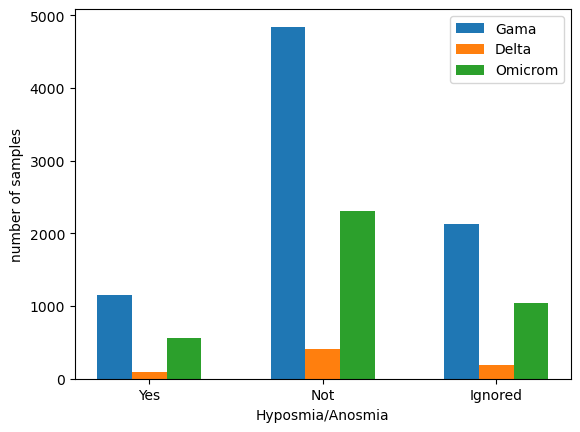


------------- Valor Total e Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------



,Gama N,Delta N,Omicrom N
Yes,1149 (14.16),98 (14.1),559 (14.3)
Not,4841 (59.64),412 (59.28),2307 (59.02)
Ignored,2127 (26.2),185 (26.62),1043 (26.68)


In [159]:
# criando datasets que separam as variantes
selecao_gama = (df['DT_COLETA'] >= '2021-03-01') & (df['DT_COLETA'] <= '2021-07-30')
selecao_delta = (df['DT_COLETA'] >= '2021-09-01') & (df['DT_COLETA'] <= '2021-11-30')
selecao_omicrom = (df['DT_COLETA'] >= '2022-01-01') & (df['DT_COLETA'] <= '2022-08-30')

df_selecao_gama = df[selecao_gama]
df_selecao_delta = df[selecao_delta]
df_selecao_omicrom = df[selecao_omicrom]

lista_gama = df[selecao_gama]['DT_COLETA'].tolist()
lista_delta = df[selecao_delta]['DT_COLETA'].tolist()
lista_omicrom = df[selecao_omicrom]['DT_COLETA'].tolist()
resultados_gama=[]
resultados_delta=[]
resultados_omicrom=[]

for i in range(len(lista_gama)):
  lista_gama[i] = 1 # definindo variante gama como 1

for i in range(len(lista_delta)):
  lista_delta[i] = 2 # definindo variante delta como 2

for i in range(len(lista_omicrom)):
  lista_omicrom[i] = 3 # definindo variante omicrom como 3

for i in range(len(df[selecao_gama])):
   concat1=[lista_perd_olft[i],lista_gama[i]]
   resultados_gama.append(concat1)
for i in range(len(df[selecao_delta])):
   concat2=[lista_perd_olft[i],lista_delta[i]]
   resultados_delta.append(concat2)
for i in range(len(df[selecao_omicrom])):
   concat3=[lista_perd_olft[i],lista_omicrom[i]]
   resultados_omicrom.append(concat3)

resultados = resultados_gama + resultados_delta + resultados_omicrom

Faixa = ['Yes','Not','Ignored']

lista_1 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 1:
    lista_1.append(resultados[i][1])

lista_2 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 2:
    lista_2.append(resultados[i][1])

lista_3 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 9:
    lista_3.append(resultados[i][1])

y1 = [lista_1.count(1),lista_2.count(1), lista_3.count(1)]
y2 =[lista_1.count(2),lista_2.count(2), lista_3.count(2)]
y3 = [lista_1.count(3),lista_2.count(3), lista_3.count(3)]

matrix_table_int = np.array([y1,y2,y3]).transpose()
df_table_int = pd.DataFrame(matrix_table_int, columns=['Gama N', 'Delta N', 'Omicrom N'], index = Faixa)
df_table_int.loc['Total',:]= df_table_int.sum(axis=0)
df_table_int.loc[:,'Total'] = df_table_int.sum(axis=1)

#calculo do p-value : Qual a evidência de uma correlação entre a idade (no geral) e o tipo de variante do covid?
alpha = 0.05
chi_square = 0
columns = df_table_int.iloc[:,0:3].columns
rows = df_table_int.iloc[0:3].index
for i in columns:
  for j in rows:
    O = df_table_int[i][j] #observed value
    E = df_table_int[i]['Total'] *df_table_int['Total'][j] / df_table_int['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E

print()
print('------------- Valor p  : ----------------')
print()

p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

print()
print('Gráfico com a relação entre a perda de olfato e a variante do covid: ')
print()

width = 0.2

x = np.arange(len(Faixa))

plt.bar(x-0.2, y1, width, label = 'Gama')
plt.bar(x, y2, width, label = 'Delta')
plt.bar(x+0.2, y3, width, label = 'Omicrom')
plt.xlabel("Hyposmia/Anosmia")
plt.ylabel("number of samples")
plt.xticks(x, Faixa)
plt.legend()
plt.show()

print()
print('------------- Valor Total e Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------')
print()

y1[:] = [float(i) / sum(y1) for i in y1]
y2[:] = [float(i) / sum(y2) for i in y2]
y3[:] = [float(i) / sum(y3) for i in y3]


y1 = [x*100 for x in y1]
y2 = [x*100 for x in y2]
y3 = [x*100 for x in y3]

y1 = [round(x,2) for x in y1]
y2 = [round(x,2) for x in y2]
y3 = [round(x,2) for x in y3]

matrix_table = np.array([y1,y2,y3])
matrix_table = matrix_table.transpose()
df_table = pd.DataFrame(matrix_table, columns=['Gama N (%) ', 'Delta N (%) ', 'Omicrom N (%)'], index = Faixa)

df_Perda_Olfato = df_table_int.iloc[0:3 :,0:3]
df_Perda_Olfato = df_Perda_Olfato.astype(int)
df_Perda_Olfato['Gama N (%)'] = df_table['Gama N (%) ']
df_Perda_Olfato['Delta N (%)'] = df_table['Delta N (%) ']
df_Perda_Olfato['Omicrom N (%)'] = df_table['Omicrom N (%)']
df_Perda_Olfato = df_Perda_Olfato.astype(str)

df_Perda_Olfato['Gama N'] = df_Perda_Olfato.apply(lambda x: x['Gama N'] + ' (' + x['Gama N (%)'] + ')', axis=1)
df_Perda_Olfato['Delta N'] = df_Perda_Olfato.apply(lambda x: x['Delta N'] + ' (' + x['Delta N (%)'] + ')', axis=1)
df_Perda_Olfato['Omicrom N'] = df_Perda_Olfato.apply(lambda x: x['Omicrom N'] + ' (' + x['Omicrom N (%)'] + ')', axis=1)
df_Perda_Olfato.drop(columns = ['Gama N (%)','Delta N (%)','Omicrom N (%)'], inplace = True)
display(df_Perda_Olfato)

relationship between loss of taste and covid variant


------------- Valor p  : ----------------

H₀: The two categorical variables have no relationship
p-value : 0.8445390443248323

Failed to reject the null hypothesis.

Gráfico com a relação entre a perda de paladar e a variante do covid: 



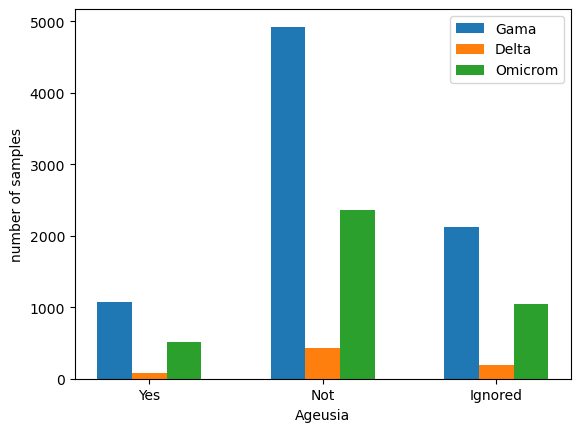


------------- Valor Total e porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------



,Gama N,Delta N,Omicrom N
Yes,1072 (13.21),82 (11.8),512 (13.1)
Not,4922 (60.64),427 (61.44),2356 (60.27)
Ignored,2123 (26.15),186 (26.76),1041 (26.63)


In [160]:
# criando datasets que separam as variantes
selecao_gama = (df['DT_COLETA'] >= '2021-03-01') & (df['DT_COLETA'] <= '2021-07-30')
selecao_delta = (df['DT_COLETA'] >= '2021-09-01') & (df['DT_COLETA'] <= '2021-11-30')
selecao_omicrom = (df['DT_COLETA'] >= '2022-01-01') & (df['DT_COLETA'] <= '2022-08-30')

df_selecao_gama = df[selecao_gama]
df_selecao_delta = df[selecao_delta]
df_selecao_omicrom = df[selecao_omicrom]

lista_gama = df[selecao_gama]['DT_COLETA'].tolist()
lista_delta = df[selecao_delta]['DT_COLETA'].tolist()
lista_omicrom = df[selecao_omicrom]['DT_COLETA'].tolist()
resultados_gama=[]
resultados_delta=[]
resultados_omicrom=[]

for i in range(len(lista_gama)):
  lista_gama[i] = 1 # definindo variante gama como 1

for i in range(len(lista_delta)):
  lista_delta[i] = 2 # definindo variante delta como 2

for i in range(len(lista_omicrom)):
  lista_omicrom[i] = 3 # definindo variante omicrom como 3

for i in range(len(df[selecao_gama])):
   concat1=[lista_perd_pala[i],lista_gama[i]]
   resultados_gama.append(concat1)
for i in range(len(df[selecao_delta])):
   concat2=[lista_perd_pala[i],lista_delta[i]]
   resultados_delta.append(concat2)
for i in range(len(df[selecao_omicrom])):
   concat3=[lista_perd_pala[i],lista_omicrom[i]]
   resultados_omicrom.append(concat3)

resultados = resultados_gama + resultados_delta + resultados_omicrom

Faixa = ['Yes','Not','Ignored']

lista_1 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 1:
    lista_1.append(resultados[i][1])

lista_2 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 2:
    lista_2.append(resultados[i][1])

lista_3 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 9:
    lista_3.append(resultados[i][1])

y1 = [lista_1.count(1),lista_2.count(1), lista_3.count(1)]
y2 =[lista_1.count(2),lista_2.count(2), lista_3.count(2)]
y3 = [lista_1.count(3),lista_2.count(3), lista_3.count(3)]

matrix_table_int = np.array([y1,y2,y3]).transpose()
df_table_int = pd.DataFrame(matrix_table_int, columns=['Gama N', 'Delta N', 'Omicrom N'], index = Faixa)
df_table_int.loc['Total',:]= df_table_int.sum(axis=0)
df_table_int.loc[:,'Total'] = df_table_int.sum(axis=1)

#calculo do p-value : Qual a evidência de uma correlação entre a idade (no geral) e o tipo de variante do covid?
alpha = 0.05
chi_square = 0
columns = df_table_int.iloc[:,0:3].columns
rows = df_table_int.iloc[0:3].index
for i in columns:
  for j in rows:
    O = df_table_int[i][j] #observed value
    E = df_table_int[i]['Total'] *df_table_int['Total'][j] / df_table_int['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E

print()
print('------------- Valor p  : ----------------')
print()

p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

print()
print('Gráfico com a relação entre a perda de paladar e a variante do covid: ')
print()

width = 0.2

x = np.arange(len(Faixa))

plt.bar(x-0.2, y1, width, label = 'Gama')
plt.bar(x, y2, width, label = 'Delta')
plt.bar(x+0.2, y3, width, label = 'Omicrom')
plt.xlabel("Ageusia")
plt.ylabel("number of samples")
plt.xticks(x, Faixa)
plt.legend()
plt.show()

print()
print('------------- Valor Total e porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------')
print()

y1[:] = [float(i) / sum(y1) for i in y1]
y2[:] = [float(i) / sum(y2) for i in y2]
y3[:] = [float(i) / sum(y3) for i in y3]


y1 = [x*100 for x in y1]
y2 = [x*100 for x in y2]
y3 = [x*100 for x in y3]

y1 = [round(x,2) for x in y1]
y2 = [round(x,2) for x in y2]
y3 = [round(x,2) for x in y3]

matrix_table = np.array([y1,y2,y3])
matrix_table = matrix_table.transpose()
df_table = pd.DataFrame(matrix_table, columns=['Gama N (%) ', 'Delta N (%) ', 'Omicrom N (%)'], index = Faixa)

df_Perda_Paladar = df_table_int.iloc[0:3 :,0:3]
df_Perda_Paladar = df_Perda_Paladar.astype(int)
df_Perda_Paladar['Gama N (%)'] = df_table['Gama N (%) ']
df_Perda_Paladar['Delta N (%)'] = df_table['Delta N (%) ']
df_Perda_Paladar['Omicrom N (%)'] = df_table['Omicrom N (%)']
df_Perda_Paladar = df_Perda_Paladar.astype(str)

df_Perda_Paladar['Gama N'] = df_Perda_Paladar.apply(lambda x: x['Gama N'] + ' (' + x['Gama N (%)'] + ')', axis=1)
df_Perda_Paladar['Delta N'] = df_Perda_Paladar.apply(lambda x: x['Delta N'] + ' (' + x['Delta N (%)'] + ')', axis=1)
df_Perda_Paladar['Omicrom N'] = df_Perda_Paladar.apply(lambda x: x['Omicrom N'] + ' (' + x['Omicrom N (%)'] + ')', axis=1)
df_Perda_Paladar.drop(columns = ['Gama N (%)','Delta N (%)','Omicrom N (%)'], inplace = True)
display(df_Perda_Paladar)

relationship between saturation and covid variant


------------- Valor p  : ----------------

H₀: The two categorical variables have no relationship
p-value : 0.8900024151857227

Failed to reject the null hypothesis.

Gráfico com a relação entre a saturação e a variante do covid: 



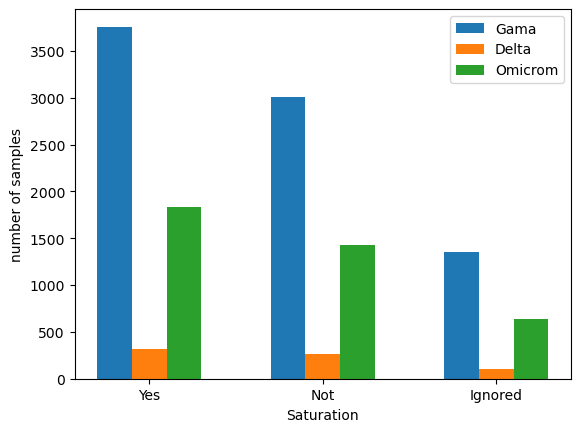


------------- Valor Total e Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------



,Gama N,Delta N,Omicrom N
Yes,3758 (46.3),321 (46.19),1837 (46.99)
Not,3006 (37.03),265 (38.13),1432 (36.63)
Ignored,1353 (16.67),109 (15.68),640 (16.37)


In [161]:
# criando datasets que separam as variantes
selecao_gama = (df['DT_COLETA'] >= '2021-03-01') & (df['DT_COLETA'] <= '2021-07-30')
selecao_delta = (df['DT_COLETA'] >= '2021-09-01') & (df['DT_COLETA'] <= '2021-11-30')
selecao_omicrom = (df['DT_COLETA'] >= '2022-01-01') & (df['DT_COLETA'] <= '2022-08-30')

df_selecao_gama = df[selecao_gama]
df_selecao_delta = df[selecao_delta]
df_selecao_omicrom = df[selecao_omicrom]

lista_gama = df[selecao_gama]['DT_COLETA'].tolist()
lista_delta = df[selecao_delta]['DT_COLETA'].tolist()
lista_omicrom = df[selecao_omicrom]['DT_COLETA'].tolist()
resultados_gama=[]
resultados_delta=[]
resultados_omicrom=[]

for i in range(len(lista_gama)):
  lista_gama[i] = 1 # definindo variante gama como 1

for i in range(len(lista_delta)):
  lista_delta[i] = 2 # definindo variante delta como 2

for i in range(len(lista_omicrom)):
  lista_omicrom[i] = 3 # definindo variante omicrom como 3

for i in range(len(df[selecao_gama])):
   concat1=[lista_saturacao[i],lista_gama[i]]
   resultados_gama.append(concat1)
for i in range(len(df[selecao_delta])):
   concat2=[lista_saturacao[i],lista_delta[i]]
   resultados_delta.append(concat2)
for i in range(len(df[selecao_omicrom])):
   concat3=[lista_saturacao[i],lista_omicrom[i]]
   resultados_omicrom.append(concat3)

resultados = resultados_gama + resultados_delta + resultados_omicrom

Faixa = ['Yes','Not','Ignored']

lista_1 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 1:
    lista_1.append(resultados[i][1])

lista_2 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 2:
    lista_2.append(resultados[i][1])

lista_3 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 9:
    lista_3.append(resultados[i][1])

y1 = [lista_1.count(1),lista_2.count(1), lista_3.count(1)]
y2 =[lista_1.count(2),lista_2.count(2), lista_3.count(2)]
y3 = [lista_1.count(3),lista_2.count(3), lista_3.count(3)]

matrix_table_int = np.array([y1,y2,y3]).transpose()
df_table_int = pd.DataFrame(matrix_table_int, columns=['Gama N', 'Delta N', 'Omicrom N'], index = Faixa)
df_table_int.loc['Total',:]= df_table_int.sum(axis=0)
df_table_int.loc[:,'Total'] = df_table_int.sum(axis=1)

#calculo do p-value : Qual a evidência de uma correlação entre a idade (no geral) e o tipo de variante do covid?
alpha = 0.05
chi_square = 0
columns = df_table_int.iloc[:,0:3].columns
rows = df_table_int.iloc[0:3].index
for i in columns:
  for j in rows:
    O = df_table_int[i][j] #observed value
    E = df_table_int[i]['Total'] *df_table_int['Total'][j] / df_table_int['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E

print()
print('------------- Valor p  : ----------------')
print()

p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

print()
print('Gráfico com a relação entre a saturação e a variante do covid: ')
print()

width = 0.2

x = np.arange(len(Faixa))

plt.bar(x-0.2, y1, width, label = 'Gama')
plt.bar(x, y2, width, label = 'Delta')
plt.bar(x+0.2, y3, width, label = 'Omicrom')
plt.xlabel("Saturation")
plt.ylabel("number of samples")
plt.xticks(x, Faixa)
plt.legend()
plt.show()

print()
print('------------- Valor Total e Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------')
print()

y1[:] = [float(i) / sum(y1) for i in y1]
y2[:] = [float(i) / sum(y2) for i in y2]
y3[:] = [float(i) / sum(y3) for i in y3]

y1 = [x*100 for x in y1]
y2 = [x*100 for x in y2]
y3 = [x*100 for x in y3]

y1 = [round(x,2) for x in y1]
y2 = [round(x,2) for x in y2]
y3 = [round(x,2) for x in y3]

matrix_table = np.array([y1,y2,y3])
matrix_table = matrix_table.transpose()
df_table = pd.DataFrame(matrix_table, columns=['Gama N (%) ', 'Delta N (%) ', 'Omicrom N (%)'], index = Faixa)

df_Saturacao = df_table_int.iloc[0:3 :,0:3]
df_Saturacao = df_Saturacao.astype(int)
df_Saturacao['Gama N (%)'] = df_table['Gama N (%) ']
df_Saturacao['Delta N (%)'] = df_table['Delta N (%) ']
df_Saturacao['Omicrom N (%)'] = df_table['Omicrom N (%)']
df_Saturacao = df_Saturacao.astype(str)

df_Saturacao['Gama N'] = df_Saturacao.apply(lambda x: x['Gama N'] + ' (' + x['Gama N (%)'] + ')', axis=1)
df_Saturacao['Delta N'] = df_Saturacao.apply(lambda x: x['Delta N'] + ' (' + x['Delta N (%)'] + ')', axis=1)
df_Saturacao['Omicrom N'] = df_Saturacao.apply(lambda x: x['Omicrom N'] + ' (' + x['Omicrom N (%)'] + ')', axis=1)
df_Saturacao.drop(columns = ['Gama N (%)','Delta N (%)','Omicrom N (%)'], inplace = True)
display(df_Saturacao)

relationship between abdominal pain and covid variant


------------- Valor p  : ----------------

H₀: The two categorical variables have no relationship
p-value : 0.3784756054550964

Failed to reject the null hypothesis.

Gráfico com a relação entre a dor abdominal e a variante do covid: 



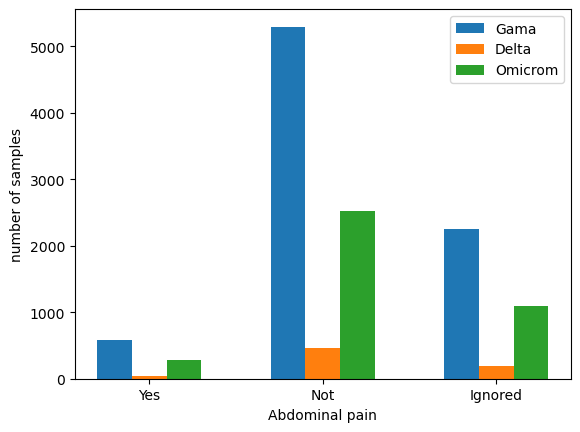


------------- Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------



,Gama N,Delta N,Omicrom N
Yes,578 (7.12),37 (5.32),286 (7.32)
Not,5294 (65.22),469 (67.48),2530 (64.72)
Ignored,2245 (27.66),189 (27.19),1093 (27.96)


In [162]:
# criando datasets que separam as variantes
selecao_gama = (df['DT_COLETA'] >= '2021-03-01') & (df['DT_COLETA'] <= '2021-07-30')
selecao_delta = (df['DT_COLETA'] >= '2021-09-01') & (df['DT_COLETA'] <= '2021-11-30')
selecao_omicrom = (df['DT_COLETA'] >= '2022-01-01') & (df['DT_COLETA'] <= '2022-08-30')

df_selecao_gama = df[selecao_gama]
df_selecao_delta = df[selecao_delta]
df_selecao_omicrom = df[selecao_omicrom]

lista_gama = df[selecao_gama]['DT_COLETA'].tolist()
lista_delta = df[selecao_delta]['DT_COLETA'].tolist()
lista_omicrom = df[selecao_omicrom]['DT_COLETA'].tolist()
resultados_gama=[]
resultados_delta=[]
resultados_omicrom=[]

for i in range(len(lista_gama)):
  lista_gama[i] = 1 # definindo variante gama como 1

for i in range(len(lista_delta)):
  lista_delta[i] = 2 # definindo variante delta como 2

for i in range(len(lista_omicrom)):
  lista_omicrom[i] = 3 # definindo variante omicrom como 3

for i in range(len(df[selecao_gama])):
   concat1=[lista_dor_abd[i],lista_gama[i]]
   resultados_gama.append(concat1)
for i in range(len(df[selecao_delta])):
   concat2=[lista_dor_abd[i],lista_delta[i]]
   resultados_delta.append(concat2)
for i in range(len(df[selecao_omicrom])):
   concat3=[lista_dor_abd[i],lista_omicrom[i]]
   resultados_omicrom.append(concat3)

resultados = resultados_gama + resultados_delta + resultados_omicrom

Faixa = ['Yes','Not','Ignored']

lista_1 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 1:
    lista_1.append(resultados[i][1])

lista_2 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 2:
    lista_2.append(resultados[i][1])

lista_3 = []
for i in range(len(resultados)) :
  if resultados[i][0] == 9:
    lista_3.append(resultados[i][1])

y1 = [lista_1.count(1),lista_2.count(1), lista_3.count(1)]
y2 =[lista_1.count(2),lista_2.count(2), lista_3.count(2)]
y3 = [lista_1.count(3),lista_2.count(3), lista_3.count(3)]

matrix_table_int = np.array([y1,y2,y3]).transpose()
df_table_int = pd.DataFrame(matrix_table_int, columns=['Gama N', 'Delta N', 'Omicrom N'], index = Faixa)
df_table_int.loc['Total',:]= df_table_int.sum(axis=0)
df_table_int.loc[:,'Total'] = df_table_int.sum(axis=1)

#calculo do p-value : Qual a evidência de uma correlação entre a idade (no geral) e o tipo de variante do covid?
alpha = 0.05
chi_square = 0
columns = df_table_int.iloc[:,0:3].columns
rows = df_table_int.iloc[0:3].index
for i in columns:
  for j in rows:
    O = df_table_int[i][j] #observed value
    E = df_table_int[i]['Total'] *df_table_int['Total'][j] / df_table_int['Total']['Total'] # expected frequency
    chi_square += (O-E)**2/E

print()
print('------------- Valor p  : ----------------')
print()

p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)) #The number of degrees of freedom of the χ2 independence test statistics: d.f. = (# rows -1) *(#columns-1)
print('H₀: The two categorical variables have no relationship')
print('p-value :',p_value)
print()
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
print(conclusion)

print()
print('Gráfico com a relação entre a dor abdominal e a variante do covid: ')
print()

width = 0.2

x = np.arange(len(Faixa))

plt.bar(x-0.2, y1, width, label = 'Gama')
plt.bar(x, y2, width, label = 'Delta')
plt.bar(x+0.2, y3, width, label = 'Omicrom')
plt.xlabel("Abdominal pain")
plt.ylabel("number of samples")
plt.xticks(x, Faixa)
plt.legend()
plt.show()

print()
print('------------- Porcentagem para as variantes Gama, Delta e Omicrom, respectivamente : ----------------')
print()

y1[:] = [float(i) / sum(y1) for i in y1]
y2[:] = [float(i) / sum(y2) for i in y2]
y3[:] = [float(i) / sum(y3) for i in y3]


y1 = [x*100 for x in y1]
y2 = [x*100 for x in y2]
y3 = [x*100 for x in y3]

y1 = [round(x,2) for x in y1]
y2 = [round(x,2) for x in y2]
y3 = [round(x,2) for x in y3]

matrix_table = np.array([y1,y2,y3])
matrix_table = matrix_table.transpose()
df_table = pd.DataFrame(matrix_table, columns=['Gama N (%) ', 'Delta N (%) ', 'Omicrom N (%)'], index = Faixa)

df_Dor_Abdominal = df_table_int.iloc[0:3 :,0:3]
df_Dor_Abdominal = df_Dor_Abdominal.astype(int)
df_Dor_Abdominal['Gama N (%)'] = df_table['Gama N (%) ']
df_Dor_Abdominal['Delta N (%)'] = df_table['Delta N (%) ']
df_Dor_Abdominal['Omicrom N (%)'] = df_table['Omicrom N (%)']
df_Dor_Abdominal = df_Dor_Abdominal.astype(str)

df_Dor_Abdominal['Gama N'] = df_Dor_Abdominal.apply(lambda x: x['Gama N'] + ' (' + x['Gama N (%)'] + ')', axis=1)
df_Dor_Abdominal['Delta N'] = df_Dor_Abdominal.apply(lambda x: x['Delta N'] + ' (' + x['Delta N (%)'] + ')', axis=1)
df_Dor_Abdominal['Omicrom N'] = df_Dor_Abdominal.apply(lambda x: x['Omicrom N'] + ' (' + x['Omicrom N (%)'] + ')', axis=1)
df_Dor_Abdominal.drop(columns = ['Gama N (%)','Delta N (%)','Omicrom N (%)'], inplace = True)
display(df_Dor_Abdominal)

Table 2: Clinical features of SARS-CoV-2 infection among pregant and postpartum women, by SARS-COV-2 VOCs in Brazil.

In [163]:
df_Diarreia['Classe'] = 'Diarreia'
df_Garganta['Classe'] = 'Garganta'
df_Perda_Olfato['Classe'] = 'Perda_Olfato'
df_Perda_Paladar['Classe'] = 'Perda_Paladar'
df_Saturacao['Classe'] = 'df_Saturacao'
df_Vomito['Classe'] = 'Vomito'
df_Dor_Abdominal['Classe'] = 'Dor_Abdominal'
df_Fadiga['Classe'] = 'Fadiga'
df_Dispneia['Classe'] = 'Dispneia'
df_Tosse['Classe'] = 'Tosse'
df_febre['Classe'] = 'febre'

df_concatenado_tabela2 = pd.concat([df_Diarreia,df_Garganta,df_Perda_Olfato,df_Perda_Paladar,df_Saturacao,df_Vomito,df_Dor_Abdominal,df_Fadiga,df_Dispneia,df_Tosse,df_febre])
colunas_concat2 = df_concatenado_tabela2.columns.tolist()
colunas_concat2.remove("Classe")
grupos2 = df_concatenado_tabela2[colunas_concat2].groupby(df_concatenado_tabela2["Classe"])
for nome_grupo, grupo_df in grupos2:
    print("Classe: ", nome_grupo)
    print(grupo_df)
    print("\n")

Classe:  Diarreia
               Gama N      Delta N     Omicrom N
Yes        733 (9.03)    49 (7.05)     340 (8.7)
Not      5264 (64.85)  465 (66.91)  2539 (64.95)
Ignored  2120 (26.12)  181 (26.04)  1030 (26.35)


Classe:  Dispneia
               Gama N      Delta N     Omicrom N
Yes      4979 (61.34)   417 (60.0)  2397 (61.32)
Not      2165 (26.67)  201 (28.92)  1049 (26.84)
Ignored   973 (11.99)   77 (11.08)   463 (11.84)


Classe:  Dor_Abdominal
               Gama N      Delta N     Omicrom N
Yes        578 (7.12)    37 (5.32)    286 (7.32)
Not      5294 (65.22)  469 (67.48)  2530 (64.72)
Ignored  2245 (27.66)  189 (27.19)  1093 (27.96)


Classe:  Fadiga
               Gama N      Delta N     Omicrom N
Yes      2098 (25.85)  184 (26.47)  1037 (26.53)
Not      4043 (49.81)  347 (49.93)  1911 (48.89)
Ignored  1976 (24.34)   164 (23.6)   961 (24.58)


Classe:  Garganta
               Gama N      Delta N     Omicrom N
Yes      1649 (20.32)  148 (21.29)   810 (20.72)
Not      4582 (56